# Run the PROPER models for comparisons.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from matplotlib.patches import Circle
import numpy as np
import astropy.io.fits as fits 
import astropy.units as u
import time
from IPython.display import clear_output

import proper
import poppy

import wfirst_phaseb_proper
wfirst_phaseb_proper.set_data_dir()
# wfirst_phaseb_proper.copy_here()
# wfirst_phaseb_proper.copy_examples_here()

from importlib import reload
import misc
reload(misc)

<module 'misc' from '/home/u21/kianmilani/Documents/webbpsf-mydev/misc.py'>

In [2]:
proper.prop_use_fftw(DISABLE=False)
# proper.prop_fftw_wisdom( 2048 ) 


In [8]:
proper.prop_use_ffti(DISABLE=True)

Intel MKL Library not found. Using Numpy FFT.


PROPER calculation completed in 11.4321s
3.3609467264964907e-06 m / pix


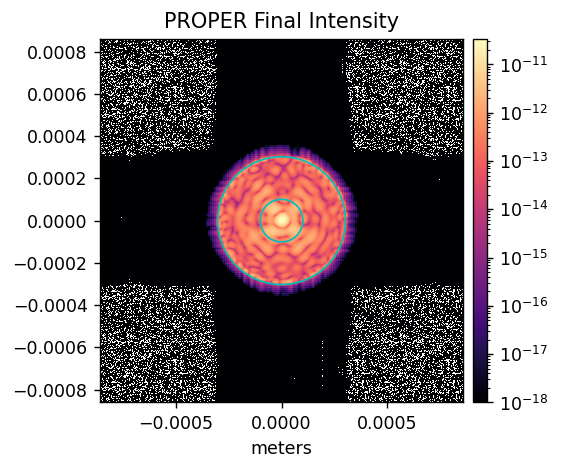

In [8]:
nlam = 1
lam_array = np.array([0.575])
n = 512                 # output image dimension (must be power of 2)
final_sampling = 0.1    # output sampling in lam0/D

xoffset = 0
use_fpm = 1

use_errors = 0
use_hlc_dm_patterns = 1
use_dm1 = 0
use_dm2 = 0
dm1 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/hlc_with_aberrations_dm1.fits' )
dm2 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/hlc_with_aberrations_dm2.fits' )
polaxis = 0
use_fieldstop = 1

start = time.time()
(wfs, wfs_sampling_m) = proper.prop_run_multi('wfirst_phaseb', lam_array, n, QUIET=False, 
                                                PASSVALUE={'cor_type':'hlc',
                                                           'final_sampling_lam0':final_sampling, 
                                                           'source_x_offset':xoffset,
                                                           'use_fpm':use_fpm,
                                                           'use_errors': use_errors,
                                                           'use_hlc_dm_patterns':use_hlc_dm_patterns,
                                                           'use_dm1':use_dm1, 'dm1_m':dm1, 
                                                           'use_dm2':use_dm2, 'dm2_m':dm2,
                                                           'use_field_stop':use_fieldstop,
                                                           'polaxis':polaxis,
                                                           'data_dir':'/groups/douglase/phaseb_data'} )
clear_output()
print('PROPER calculation completed in {:.4f}s'.format(time.time()-start))

psf_wf = wfs[0]
psf_sampling_m = wfs_sampling_m[0]*u.m/u.pix

reload(misc)
innwa = 3/final_sampling*psf_sampling_m.value # inner and outer working angles in units of m
outwa = 9/final_sampling*psf_sampling_m.value
patches = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
           Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
print(psf_sampling_m)
misc.myimshow(np.abs(psf_wf)**2,
              'PROPER Final Intensity',
              lognorm=True, vmin=1e-18,
              pxscl=psf_sampling_m,
              patches=patches)

wf = np.zeros(shape=(2,n,n))
wf[0,:,:] = np.abs(wfs[0])**2
wf[1,:,:] = np.angle(wfs[0])

wf = np.zeros(shape=(2,n,n))
wf[0,:,:] = np.abs(wfs[0])**2
wf[1,:,:] = np.angle(wfs[0])

wf_fname = '/groups/douglase/hlc575-fresnel-wavefronts/wf_psf_proper.fits'

hdr = fits.Header()
hdr['PIXELSCL'] = psf_sampling_m.value
hdr['PIXSCLLD'] = final_sampling

wf_hdu = fits.PrimaryHDU(wf, header=hdr)
wf_hdu.writeto(wf_fname, overwrite=True)

PROPER calculation completed in 92.9908s
4.266928396341947e-06 m / pix


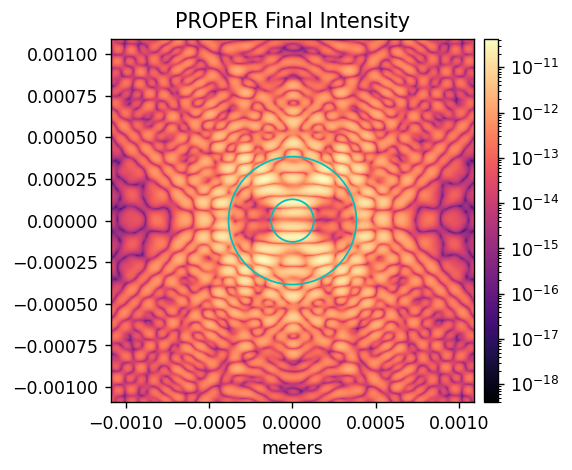

In [3]:
nlam = 1
lam_array = np.array([0.730])
n = 512                 # output image dimension (must be power of 2)
final_sampling = 0.1    # output sampling in lam0/D

xoffset = 0
use_fpm = 1

use_errors = 1
use_dm1 = 1
use_dm2 = 1
dm1 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/spc-spec_long_with_aberrations_dm1.fits' )
dm2 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/spc-spec_long_with_aberrations_dm2.fits' )
polaxis = 10

start = time.time()
(wfs, wfs_sampling_m) = proper.prop_run_multi('wfirst_phaseb', lam_array, n, QUIET=False, 
                                                PASSVALUE={'cor_type':'spc-spec_long',
                                                           'final_sampling_lam0':final_sampling, 
                                                           'source_x_offset':xoffset,
                                                           'use_fpm':use_fpm,
                                                           'use_errors': use_errors,
                                                           'use_dm1':use_dm1, 'dm1_m':dm1, 
                                                           'use_dm2':use_dm2, 'dm2_m':dm2,
                                                           'polaxis':polaxis,
                                                           'data_dir':'/groups/douglase/phaseb_data'} )
clear_output()
print('PROPER calculation completed in {:.4f}s'.format(time.time()-start))

psf_wf = wfs[0]
psf_sampling_m = wfs_sampling_m[0]*u.m/u.pix

reload(misc)
innwa = 3/final_sampling*psf_sampling_m.value # inner and outer working angles in units of m
outwa = 9/final_sampling*psf_sampling_m.value
patches = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
           Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
print(psf_sampling_m)
misc.myimshow(np.abs(psf_wf)**2,
              'PROPER Final Intensity',
              pxscl=psf_sampling_m,
              lognorm=True,
              patches=patches)

wf = np.zeros(shape=(2,n,n))
wf[0,:,:] = np.abs(wfs[0])**2
wf[1,:,:] = np.angle(wfs[0])

wf_fname = '/groups/douglase/spc730-fresnel-wavefronts/wf_psf_proper.fits'

hdr = fits.Header()
hdr['PIXELSCL'] = psf_sampling_m.value
hdr['PIXSCLLD'] = final_sampling

wf_hdu = fits.PrimaryHDU(wf, header=hdr)
wf_hdu.writeto(wf_fname, overwrite=True)

PROPER calculation completed in 201.7564s
4.8222031453887805e-06 m / pix


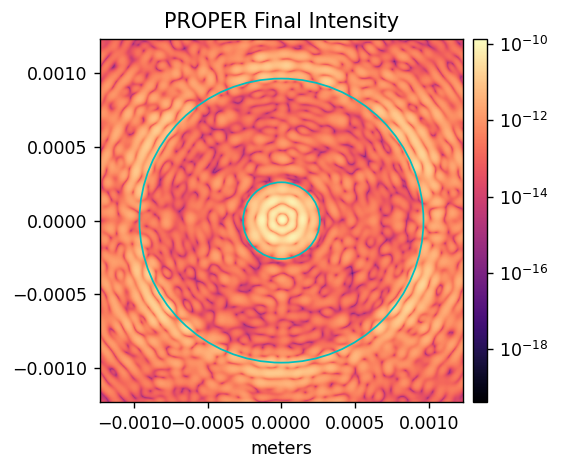

In [4]:
nlam = 1
lam_array = np.array([0.825])
n = 512                 # output image dimension (must be power of 2)
final_sampling = 0.1    # output sampling in lam0/D

xoffset = 0
use_fpm = 1

use_errors = 1
use_dm1 = 1
use_dm2 = 1
dm1 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/spc-wide_with_aberrations_dm1.fits' )
dm2 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/spc-wide_with_aberrations_dm2.fits' )
polaxis = 10

start = time.time()
(wfs, wfs_sampling_m) = proper.prop_run_multi('wfirst_phaseb', lam_array, n, QUIET=False, 
                                                PASSVALUE={'cor_type':'spc-wide',
                                                           'final_sampling_lam0':final_sampling, 
                                                           'source_x_offset':xoffset,
                                                           'use_fpm':use_fpm,
                                                           'use_errors': use_errors,
                                                           'use_dm1':use_dm1, 'dm1_m':dm1, 
                                                           'use_dm2':use_dm2, 'dm2_m':dm2,
                                                           'polaxis':polaxis,
                                                           'data_dir':'/groups/douglase/phaseb_data'} )
clear_output()
print('PROPER calculation completed in {:.4f}s'.format(time.time()-start))

psf_wf = wfs[0]
psf_sampling_m = wfs_sampling_m[0]*u.m/u.pix

reload(misc)
innwa = 5.4/final_sampling*psf_sampling_m.value # inner and outer working angles in units of m
outwa = 20/final_sampling*psf_sampling_m.value
patches = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
           Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
print(psf_sampling_m)
misc.myimshow(np.abs(psf_wf)**2,
              'PROPER Final Intensity',
              lognorm=True,
              pxscl=psf_sampling_m,
              patches=patches)

wf = np.zeros(shape=(2,n,n))
wf[0,:,:] = np.abs(wfs[0])**2
wf[1,:,:] = np.angle(wfs[0])

wf_fname = '/groups/douglase/spc825-fresnel-wavefronts/wf_psf_proper.fits'

hdr = fits.Header()
hdr['PIXELSCL'] = psf_sampling_m.value
hdr['PIXSCLLD'] = final_sampling

wf_hdu = fits.PrimaryHDU(wf, header=hdr)
wf_hdu.writeto(wf_fname, overwrite=True)